# **Tech 2024 Competition:**
Presented by **GurpreetSingh**

# **1.Understand the Datasets:**


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_excel("/content/drive/MyDrive/NOVA_AI/tech_layoffs.xlsx")
dataset.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [25]:
dataset.columns

Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'lng'],
      dtype='object')

In [26]:
len(dataset.columns)

16

In [27]:
len(dataset)

1672

In [28]:
dataset['Date_layoffs'] = pd.to_datetime(dataset['Date_layoffs'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1672 non-null   int64         
 1   Company                      1672 non-null   object        
 2   Location_HQ                  1672 non-null   object        
 3   Country                      1672 non-null   object        
 4   Continent                    1672 non-null   object        
 5   Laid_Off                     1565 non-null   float64       
 6   Date_layoffs                 1672 non-null   datetime64[ns]
 7   Percentage                   1570 non-null   float64       
 8   Company_Size_before_Layoffs  1511 non-null   float64       
 9   Company_Size_after_layoffs   1536 non-null   float64       
 10  Industry                     1672 non-null   object        
 11  Stage                        1672 non-null 

all over the **NAN** records are removed

In [29]:
dataset.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [30]:
print(dataset.isna().sum()) #No NA values

#                                0
Company                          0
Location_HQ                      0
Country                          0
Continent                        0
Laid_Off                       107
Date_layoffs                     0
Percentage                     102
Company_Size_before_Layoffs    161
Company_Size_after_layoffs     136
Industry                         0
Stage                            0
Money_Raised_in_$_mil           76
Year                             0
lat                              0
lng                              0
dtype: int64


In [31]:
dataset['Country'].unique()

array(['India', 'Israel', 'USA', 'Sweden', 'United Kingdom', 'Canada',
       'France', 'Netherlands', 'Germany', 'Estonia', 'Kenya', 'Brazil',
       'New Zealand', 'Ireland', 'Australia', 'Singapore', 'Chile',
       'Spain', 'South Korea', 'Indonesia', 'Japan', 'China', 'Argentina',
       'Nigeria', 'United Arabian Emirates', 'Denmark', 'Norway',
       'Thailand', 'Senegal', 'Hong Kong', 'Austria', 'Finland',
       'Malaysia', 'Mexico', 'Russia', 'Switzerland', 'Portugal',
       'Lithuania', 'Poland', 'Cayman Islands', 'Czech Republic',
       'Pakistan'], dtype=object)

In [32]:
dataset.dtypes

#                                       int64
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                              float64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs           float64
Company_Size_after_layoffs            float64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object

In [33]:
dataset.isnull().sum()

#                                0
Company                          0
Location_HQ                      0
Country                          0
Continent                        0
Laid_Off                       107
Date_layoffs                     0
Percentage                     102
Company_Size_before_Layoffs    161
Company_Size_after_layoffs     136
Industry                         0
Stage                            0
Money_Raised_in_$_mil           76
Year                             0
lat                              0
lng                              0
dtype: int64

# **EDA(Exploratory Data Analysis)**

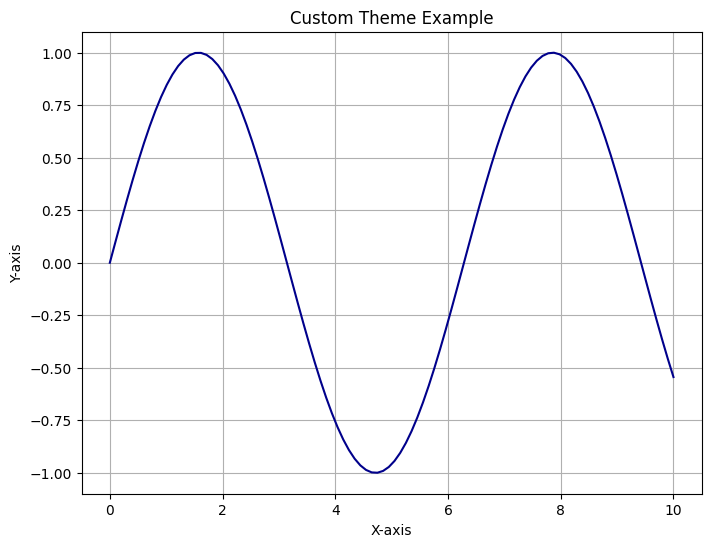

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom color palettes
my_palette_custom_all = ["#34f5ff", "#33eff9", "#32e9f3", "#32e3ec", "#31dde6", "#30d7e0", "#2fd1da", "#2fcbd4",
                         "#2ec6cd", "#2dc0c7", "#2cbac1", "#2cb4bb", "#2baeb5", "#2aa8ae", "#29a2a8", "#299ca2",
                         "#28969c", "#279095", "#268a8f", "#268489", "#257e83", "#24787d", "#237376", "#236d70",
                         "#22676a", "#216164", "#205b5e", "#205557", "#1f4f51", "#1e494b", "#fcff4f", "#f5f955",
                         "#edf35b", "#e6ed61", "#dee767", "#d7e16d", "#cfdb73", "#c8d579", "#c0d080", "#b9ca86",
                         "#b1c48c", "#aabe92", "#a2b898", "#9bb29e", "#93aca4", "#8ca6aa", "#84a0b0", "#7d9ab6",
                         "#7594bc", "#6e8ec2", "#6688c8", "#5f82ce", "#577dd5", "#5077db", "#4871e1", "#416be7",
                         "#3965ed", "#325ff3", "#2a59f9", "#2353ff", "#1531ff", "#1631fa", "#1630f6", "#1730f1",
                         "#1730ed", "#182fe8", "#182fe3", "#192fdf", "#192fda", "#1a2ed5", "#1a2ed1", "#1b2ecc",
                         "#1b2dc8", "#1c2dc3", "#1c2dbe", "#1d2cba", "#1d2cb5", "#1e2cb0", "#1e2bac", "#1f2ba7",
                         "#1f2ba3", "#202a9e", "#202a99", "#212a95", "#212a90", "#22298b", "#222987", "#232982",
                         "#23287e", "#242879", "#ff6d2a", "#f86a31", "#f16639", "#ea6340", "#e35f47", "#dc5c4f",
                         "#d55856", "#ce555d", "#c85165", "#c14e6c", "#ba4b73", "#b3477b", "#ac4482", "#a54089",
                         "#9e3d91", "#973998", "#9036a0", "#8932a7", "#822fae", "#7b2bb6", "#7428bd", "#6d25c4",
                         "#6721cc", "#601ed3", "#591ada", "#5217e2", "#4b13e9", "#4410f0", "#3d0cf8", "#3609ff",
                         "#fbffae", "#f3f9ab", "#ecf2a7", "#e4eca4", "#dde6a0", "#d5e09d", "#cdd99a", "#c6d396",
                         "#becd93", "#b6c78f", "#afc08c", "#a7ba88", "#a0b485", "#98ad82", "#90a77e", "#89a17b",
                         "#819b77", "#799474", "#728e71", "#6a886d", "#63816a", "#5b7b66", "#537563", "#4c6f5f",
                         "#44685c", "#3c6259", "#355c55", "#2d5652", "#264f4e", "#1e494b"]

my_palette_TealGrn = plt.get_cmap("viridis", 30).colors
my_palette_Blue_Yellow = plt.get_cmap("cividis", 30).colors

my_colors = ["darkblue", "darkslategray4", "darkslategray2", "yellow", "azure3", "aquamarine2", "cornflowerblue",
             "lightyellow", "cadetblue2", "blue1", "cyan", "azure1", "aquamarine", "darkgoldenrod1", "cadetblue",
             "blue2", "cyan1", "deepskyblue2", "darkslategray1", "darkgoldenrod2", "azure2", "aquamarine3",
             "cadetblue3", "blue3", "cyan2", "deepskyblue3", "darkslategray3", "azure", "cyan3", "blue4",
             "deepskyblue4", "cadetblue4", "lightyellow", "deepskyblue1", "lightblue", "darkgoldenrod",
             "deepskyblue"]

my_colors5 = ["yellow", "#deff25", "#44c6b7", "#601ed3", "#190fe4"]
my_colors3 = ["yellow", "#190fe4", "#44c6b7"]


def custom_theme_black_nolegend():
    return {
        'axes.facecolor': 'black',
        'figure.facecolor': 'black',
        'axes.grid': True,
        'grid.color': 'azure',
        'axes.edgecolor': 'white',
        'axes.labelcolor': 'white',
        'axes.titlecolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white',
        'legend.loc': 'none',
        'legend.edgecolor': 'none',
        'legend.facecolor': 'none',
        'legend.fontsize': 'medium',
        'legend.title_fontsize': None,
        'legend.frameon': False,
        'legend.numpoints': 1,
        'legend.scatterpoints': 1,
        'legend.markerscale': 1.0,
        'legend.handletextpad': 0.5,
        'legend.handlelength': 2.0,
        'legend.borderaxespad': 0.5,
        'legend.borderpad': 0.4,
        'legend.columnspacing': 2.0,
        'legend.labelspacing': 0.5,
        'legend.title_spacing': 0.2,
        'legend.borderaxespad': 0.5,
        'legend.shadow': False,
        'legend.framealpha': None,
        'legend.facecolor': None,
        'legend.edgecolor': None,
        'legend.fancybox': False,
        'legend.title_fontsize': None,
        'legend.title_fontweight': None,
        'legend.frameon': False,
        'legend.handleheight': None,
        'legend.handlelength': None,
        'legend.handlewidth': None,
        'legend.labelspacing': None,
        'legend.loc': None,
        'legend.markerscale': None,
        'legend.numpoints': None,
        'legend.scatterpoints': None,
        'legend.shadow': None,
        'legend.title_align': None,
        'legend.title_fontsize': None,
        'legend.title_fontweight': None,
        'legend.title_pad': None,
        'legend.verticalalignment': None,
        'legend.borderaxespad': None,
        'legend.columnspacing': None,
        'legend.handletextpad': None,
        'legend.handlelength': None,
        'legend.handletextpad': None,
        'legend.labelspacing': None,
        'legend.shadow': None,
        'legend.title': None,
        'legend.title_fontsize': None,
        'legend.title_fontweight': None,
        'legend.title_color': None,
        'legend.title_backgroundcolor': None,
        'legend.title_alpha': None,
        'legend.framealpha': None,
        'legend.edgecolor': None,
        'legend.borderpad': None,
        'legend.labelspacing': None,
        'legend.handlelength': None,
        'legend.handleheight': None,
        'legend.handletextpad': None,
        'legend.borderaxespad': None,
        'legend.columnspacing': None,
        'legend.fancybox': None,
        'legend.shadow': None,
        'legend.frameon': None,
        'legend.facecolor': None,
        'legend.edgecolor': None,
        'legend.linewidth': None,
        'legend.handlelength': None,
        'legend.handleheight': None,
        'legend.handletextpad': None,
        'legend.borderpad': None,
        'legend.borderaxespad': None,
        'legend.columnspacing': None,
        'legend.labelspacing': None,
        'legend.title': None,
        'legend.title_fontsize': None,
        'legend.title_fontweight': None,
        'legend.title_color': None,
        'legend.title_backgroundcolor': None,
        'legend.title_alpha': None,
        'lines.linewidth': None,
        'lines.linestyle': None,
        'lines.color': None,
        'lines.marker': None,
        'lines.markerfacecolor': None,
        'lines.markeredgecolor': None,
        'lines.markersize': None,
        'lines.markeredgewidth': None,
        'lines.antialiased': None,
        'lines.dash_capstyle': None,
        'lines.dash_joinstyle': None,
        'patch.linewidth': None,
        'patch.facecolor': None,
        'patch.edgecolor': None,
        'patch.linestyle': None,
        'patch.antialiased': None,
        'patch.fill': None,
        'patch.force_edgecolor': None,
        'patch.force_linestyle': None,
        'patch.force_facecolor': None,
        'text.color': None,
        'text.usetex': None,
        'text.latex.preamble': None,
        'text.latex.unicode': None,
        'text.latex.preview': None,
        'font.family': None,
        'font.style': None,
        'font.variant': None,
        'font.weight': None,
        'font.stretch': None,
        'font.size': None,
        'font.serif': None,
        'font.sans-serif': None,
        'font.cursive': None,
        'font.fantasy': None,
        'font.monospace': None,
        'mathtext.fontset': None,
        'mathtext.fallback_to_cm': None,
        'mathtext.default': None,
        'mathtext.rm': None,
        'mathtext.it': None,
        'mathtext.bf': None,
        'mathtext.sf': None,
        'mathtext.tt': None,
        'mathtext.cal': None,
        'mathtext.bb': None,
        'mathtext.fallback': None,
        'animation.html': None,
        'animation.writer': None,
        'animation.codec': None,
        'animation.bitrate': None,
        'animation.frame_format': None,
        'animation.ffmpeg_path': None,
        'animation.convert_path': None,
        'animation.embed_limit': None,
        'animation.ffmpeg_args': None,
        'animation.avconv_path': None,
        'animation.avconv_args': None,
        'animation.html_args': None,
        'animation.writer': None,
        'animation.writer_path': None,
        'animation.writer_args': None,
        'animation.writer_command': None,
        'animation.html': None,
        'animation.writer': None,
        'animation.embed_limit': None,
        'animation.frame_format': None,
        'animation.bitrate': None,
        'animation.ffmpeg_path': None,
        'animation.convert_path': None,
        'animation.ffmpeg_args': None,
        'animation.avconv_path': None,
        'animation.avconv_args': None,
        'animation.html_args': None,
        'animation.html': None,
        'animation.writer': None,
        'animation.writer_path': None,
        'animation.writer_args': None,
        'animation.writer_command': None,
        'interactive': None,
        'toolbar': None,
        'keymap': None,
        'animation.html': None,
        'animation.writer': None,
        'animation.embed_limit': None,
        'animation.frame_format': None,
        'animation.bitrate': None,
        'animation.ffmpeg_path': None,
        'animation.convert_path': None,
        'animation.ffmpeg_args': None,
        'animation.avconv_path': None,
        'animation.avconv_args': None,
        'animation.html_args': None,
        'animation.html': None,
        'animation.writer': None,
        'animation.writer_path': None,
        'animation.writer_args': None,
        'animation.writer_command': None,
        'text.usetex': None,
        'text.latex.preamble': None,
        'text.latex.unicode': None,
        'text.latex.preview': None,
        'font.family': None,
        'font.style': None,
        'font.variant': None,
        'font.weight': None,
        'font.stretch': None,
        'font.size': None,
        'font.serif': None,
        'font.sans-serif': None,
        'font.cursive': None,
        'font.fantasy': None,
        'font.monospace': None,
        'mathtext.fontset': None,
        'mathtext.fallback_to_cm': None,
        'mathtext.default': None,
        'mathtext.rm': None,
        'mathtext.it': None,
        'mathtext.bf': None,
        'mathtext.sf': None,
        'mathtext.tt': None,
        'mathtext.cal': None,
        'mathtext.bb': None,
        'mathtext.fallback': None,
    }


# Example usage:
plt.figure(figsize=(8, 6))
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y, color=my_colors[0])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Custom Theme Example')
plt.grid(True)
plt.show()


In [36]:
import pandas as pd

# Assuming Tech_layoffs_geo is your DataFrame

# Count unique countries
unique_countries = dataset['Country'].nunique()
message_countries = f"There are {unique_countries} unique countries in the dataset"
print(message_countries)

# Count total entries in the dataset
entries_count = len(dataset)
print(f"The dataset has {entries_count} entries.")

# Count unique companies
unique_companies = dataset['Company'].nunique()
message_companies = f"There are {unique_companies} unique companies in the dataset"
print(message_companies)




There are 42 unique countries in the dataset
The dataset has 1672 entries.
There are 1287 unique companies in the dataset


In [37]:
# Count occurrences of each continent
continent_count = dataset['Continent'].value_counts().reset_index()
continent_count.columns = ['Continent', 'Count']
continent_count_desc = continent_count.sort_values(by='Count', ascending=False)
print(continent_count_desc)



       Continent  Count
0  North America   1173
1           Asia    229
2         Europe    175
3  South America     53
4      Australia     30
5         Africa     12


In [38]:
# Count occurrences of each country
country_count = dataset['Country'].value_counts().reset_index()
country_count.columns = ['Country', 'Count']
country_count_desc = country_count.sort_values(by='Count', ascending=False)
top_10_countries = country_count_desc.head(10)
print(top_10_countries)



          Country  Count
0             USA   1086
1           India    115
2          Canada     83
3          Israel     60
4         Germany     59
5  United Kingdom     57
6          Brazil     48
7       Australia     27
8       Singapore     24
9          Sweden     18


In [39]:
# Count occurrences of each city
city_count = dataset['Location_HQ'].value_counts().reset_index()
city_count.columns = ['Location_HQ', 'Count']
city_count_desc = city_count.sort_values(by='Count', ascending=False)
top_10_city = city_count_desc.head(10)
print(top_10_city)

              Location_HQ  Count
0  San Francisco Bay Area    450
1           New York City    190
2               Bengaluru     74
3                  Boston     73
4                 Seattle     65
5             Los Angeles     62
6                Tel Aviv     55
7                  London     51
8                  Berlin     47
9                 Toronto     45
['Ahmedabad', 'Amsterdam', 'Ann Arbor', 'Atlanta', 'Auckland', 'Austin', 'Baltimore', 'Bangkok', 'Barcelona', 'Bejing', 'Belo Horizonte', 'Bend', 'Bengaluru', 'Berlin', 'Blumenau', 'Boise', 'Boston', 'Boulder', 'Brisbane', 'Bristol', 'Brno', 'Buenos Aires', 'Burlington', 'Calgary', 'Camarillo', 'Cayman Islands', 'Charleston', 'Chennai', 'Chester', 'Chicago', 'Cincinnati', 'Columbus', 'Copenhagen', 'Corvallis', 'Curitiba', 'Dakar', 'Dallas', 'Denver', 'Detroit', 'Dover', 'Dubai', 'Dublin', 'Edinburgh', 'Espoo', 'Ferdericton', 'Florianopolis', 'Fort Collins', 'Frankfurt', 'Fremont', 'Fresno', 'Gothenburg', 'Guadalajara', 'Gurugram'

In [45]:
city_count_desc

,Location_HQ,Count
0,San Francisco Bay Area,450
1,New York City,190
2,Bengaluru,74
3,Boston,73
4,Seattle,65
...,...,...
111,Blumenau,1
113,Fort Collins,1
114,Brno,1
115,Gothenburg,1


In [40]:
# List of unique cities
unique_city_list = sorted(dataset['Location_HQ'].unique())
# Uncomment the line below to view the list of unique cities
print(unique_city_list)

['Ahmedabad', 'Amsterdam', 'Ann Arbor', 'Atlanta', 'Auckland', 'Austin', 'Baltimore', 'Bangkok', 'Barcelona', 'Bejing', 'Belo Horizonte', 'Bend', 'Bengaluru', 'Berlin', 'Blumenau', 'Boise', 'Boston', 'Boulder', 'Brisbane', 'Bristol', 'Brno', 'Buenos Aires', 'Burlington', 'Calgary', 'Camarillo', 'Cayman Islands', 'Charleston', 'Chennai', 'Chester', 'Chicago', 'Cincinnati', 'Columbus', 'Copenhagen', 'Corvallis', 'Curitiba', 'Dakar', 'Dallas', 'Denver', 'Detroit', 'Dover', 'Dubai', 'Dublin', 'Edinburgh', 'Espoo', 'Ferdericton', 'Florianopolis', 'Fort Collins', 'Frankfurt', 'Fremont', 'Fresno', 'Gothenburg', 'Guadalajara', 'Gurugram', 'Haifa', 'Hamburg', 'Helsinki', 'Hong Kong', 'Indianapolis', 'Jakarta', 'Jerusalem', 'Joinville', 'Kansas City', 'Karachi', 'Karlsruhe', 'Kfar Saba', 'Kiel', 'Kitchener', 'Krakow', 'Kuala Lumpur', 'Lagos', 'Las Vegas', 'Lehi', 'Lisbon', 'Lodz', 'Logan', 'London', 'Los Angeles', 'Madison', 'Madrid', 'Malmö', 'Manchester', 'Melbourne', 'Memphis', 'Mexico City',

In [47]:
country_count_desc.head()

,Country,Count
0,USA,1086
1,India,115
2,Canada,83
3,Israel,60
4,Germany,59


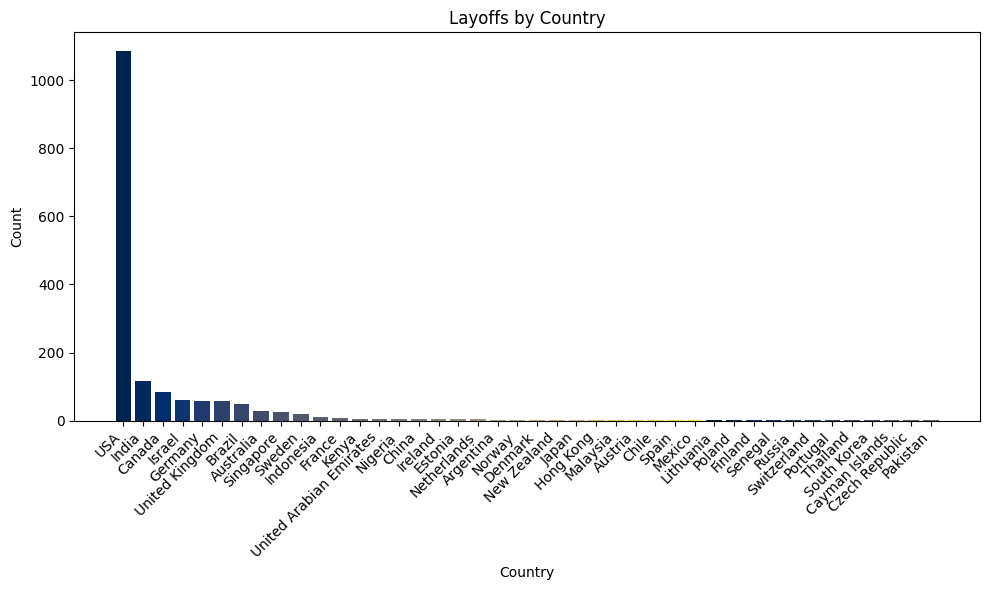

In [48]:
import matplotlib.pyplot as plt

# Assuming country_count_desc is your DataFrame
plt.figure(figsize=(10, 6))
plt.bar(country_count_desc['Country'], country_count_desc['Count'], color=my_palette_Blue_Yellow)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Layoffs by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [49]:
top_10_countries.head()

,Country,Count
0,USA,1086
1,India,115
2,Canada,83
3,Israel,60
4,Germany,59


In [54]:
import plotly.graph_objects as go

# Assuming top_10_countries_na is your DataFrame

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_10_countries['Count'],  # Switched x and y for horizontal visualization
    y=top_10_countries['Country'],
    marker=dict(color=my_palette_Blue_Yellow),
    orientation='h'
))

fig.update_layout(
    title='Top 10 Countries with Most Reported Layoffs',
    xaxis_title='Count',  # Changed to xaxis_title for specifying x-axis title
    yaxis_title='Country',  # Changed to yaxis_title for specifying y-axis title
    plot_bgcolor='white'
)

fig.show()


## **Analysis by Continent**

**North America**

In [57]:
# Filter data for North America
north_america_data = dataset[dataset['Continent'] == 'North America']

# Count occurrences of each Location_HQ in North America
location_counts = north_america_data['Location_HQ'].value_counts().reset_index()
location_counts.columns = ['Location_HQ', 'Count']

# Select top 5 locations
top_5_north_america_locations = location_counts.head(5)

print(top_5_north_america_locations)

              Location_HQ  Count
0  San Francisco Bay Area    450
1           New York City    190
2                  Boston     73
3                 Seattle     65
4             Los Angeles     62


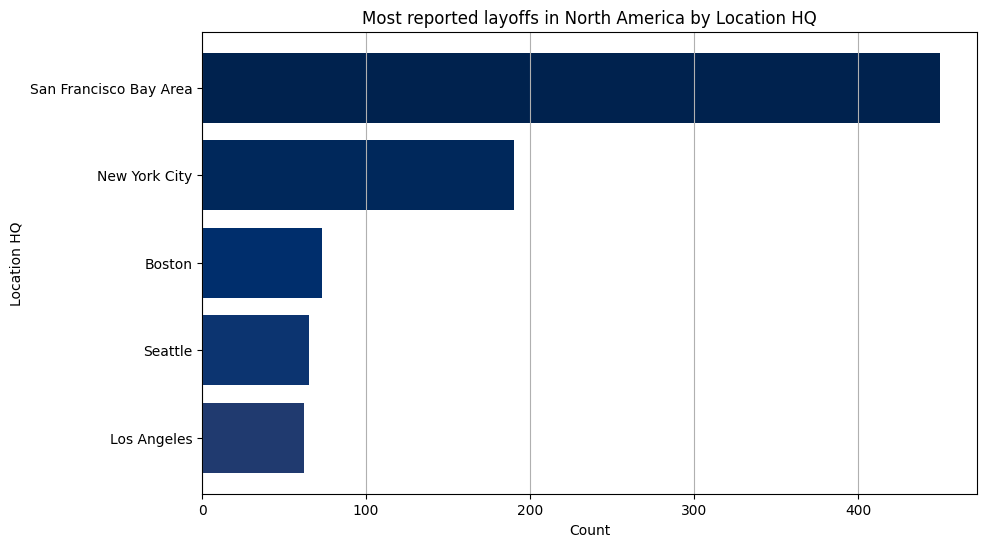

In [58]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_north_america_locations['Location_HQ'], top_5_north_america_locations['Count'], color=my_palette_Blue_Yellow)
plt.xlabel('Count')
plt.ylabel('Location HQ')
plt.title('Most reported layoffs in North America by Location HQ')
plt.gca().invert_yaxis()  # Invert y-axis to have highest count on top
plt.grid(axis='x')  # Add gridlines on x-axis
plt.show()

## **Europe:**

In [59]:
# Assuming Tech_layoffs_geo is your DataFrame

# Filter data for Europe
europe_data = dataset[dataset['Continent'] == 'Europe']

# Count occurrences of each Location_HQ in Europe
europe_location_counts = europe_data['Location_HQ'].value_counts().reset_index()
europe_location_counts.columns = ['Location_HQ', 'Count']

# Select top 10 locations
Top_10_Europe_locations_na = europe_location_counts.head(10)

print(Top_10_Europe_locations_na)


  Location_HQ  Count
0      London     51
1      Berlin     47
2   Stockholm     15
3       Paris      7
4     Tallinn      5
5      Dublin      5
6     Hamburg      4
7        Oslo      4
8      Munich      3
9  Copenhagen      3


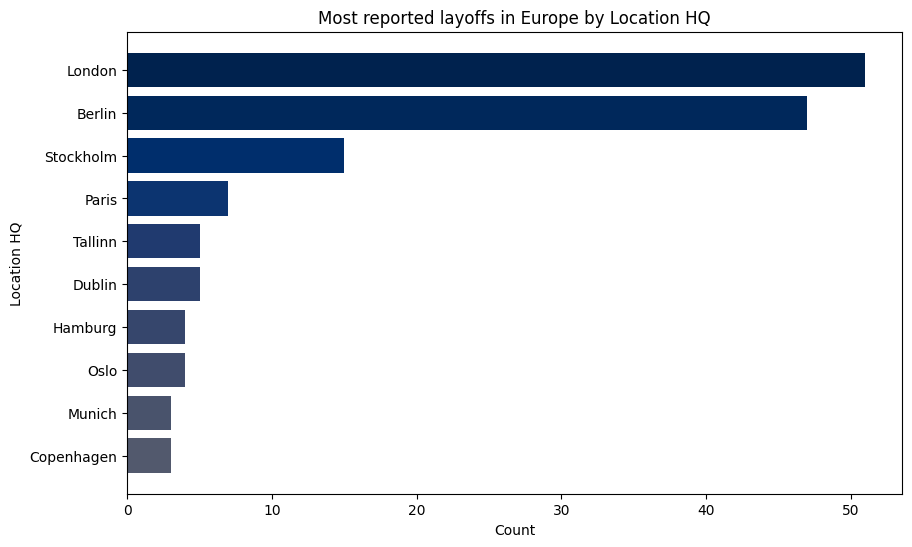

In [61]:
import matplotlib.pyplot as plt

# Assuming Top_10_Europe_locations_na is your DataFrame

plt.figure(figsize=(10, 6))
plt.barh(Top_10_Europe_locations_na['Location_HQ'], Top_10_Europe_locations_na['Count'], color=my_palette_Blue_Yellow)
plt.xlabel('Count')
plt.ylabel('Location HQ')
plt.title('Most reported layoffs in Europe by Location HQ')
plt.gca().invert_yaxis()  # Invert y-axis to have highest count on top
plt.show()


## **Asia:**


In [63]:
# Assuming Tech_layoffs_geo is your DataFrame

# Filter data for Asia
asia_data = dataset[dataset['Continent'] == 'Asia']

# Count occurrences of each Location_HQ in Asia
asia_location_counts = asia_data['Location_HQ'].value_counts().reset_index()
asia_location_counts.columns = ['Location_HQ', 'Count']

# Select top 5 locations
Top_5_Asia_locations_na = asia_location_counts.head(5)

print(Top_5_Asia_locations_na)

  Location_HQ  Count
0   Bengaluru     74
1    Tel Aviv     53
2   Singapore     24
3    Gurugram     15
4     Jakarta     10


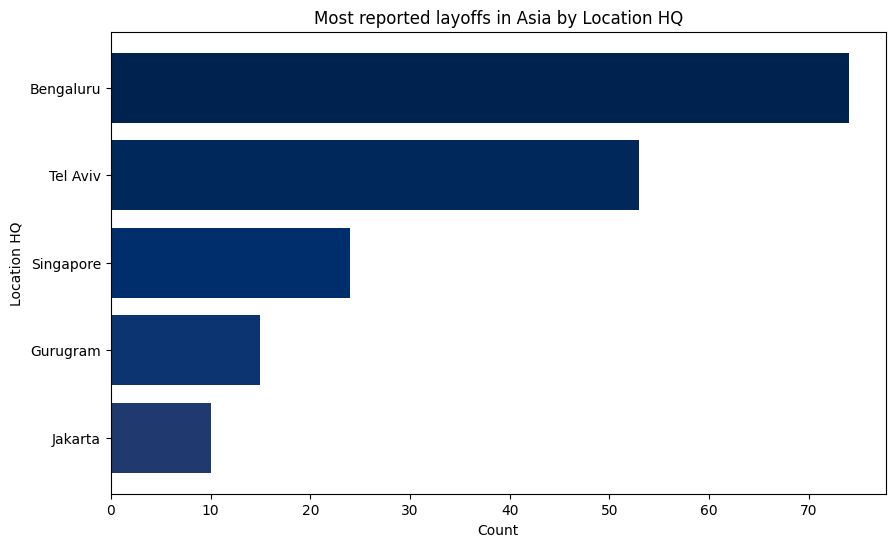

In [64]:
import matplotlib.pyplot as plt

# Assuming Top_5_Asia_locations_na is your DataFrame

plt.figure(figsize=(10, 6))
plt.barh(Top_5_Asia_locations_na['Location_HQ'], Top_5_Asia_locations_na['Count'], color=my_palette_Blue_Yellow)
plt.xlabel('Count')
plt.ylabel('Location HQ')
plt.title('Most reported layoffs in Asia by Location HQ')
plt.gca().invert_yaxis()  # Invert y-axis to have highest count on top
plt.show()


## **Afria:**

In [67]:
# Assuming Tech_layoffs_geo is your DataFrame

# Filter data for Africa
africa_data = dataset[dataset['Continent'] == 'Africa']

# Count occurrences of each Location_HQ in Africa
africa_location_counts = africa_data['Location_HQ'].value_counts().reset_index()
africa_location_counts.columns = ['Location_HQ', 'Count']

# Select top 5 locations
Top_5_Africa_locations_na = africa_location_counts.head(5)

print(Top_5_Africa_locations_na)


  Location_HQ  Count
0     Nairobi      6
1       Lagos      5
2       Dakar      1


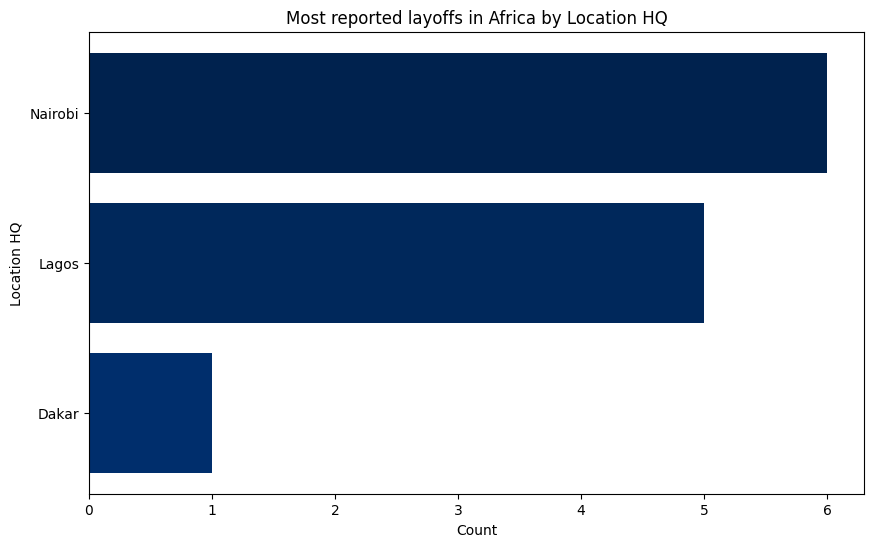

In [68]:
import matplotlib.pyplot as plt

# Assuming Top_5_Africa_locations_na is your DataFrame

plt.figure(figsize=(10, 6))
plt.barh(Top_5_Africa_locations_na['Location_HQ'], Top_5_Africa_locations_na['Count'], color=my_palette_Blue_Yellow)
plt.xlabel('Count')
plt.ylabel('Location HQ')
plt.title('Most reported layoffs in Africa by Location HQ')
plt.gca().invert_yaxis()  # Invert y-axis to have highest count on top
plt.show()


## **Australia with New Zealand**

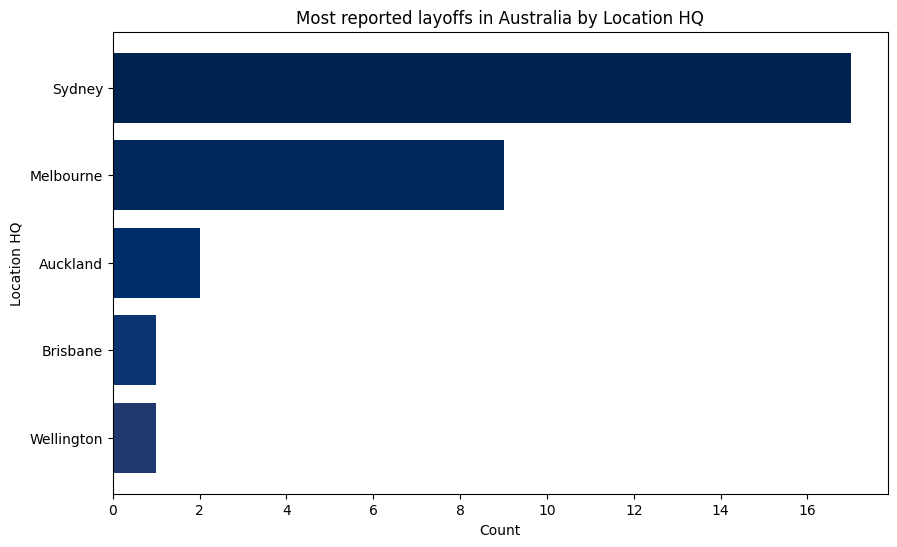

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming Tech_layoffs_geo is your DataFrame

# Filter data for Australia
australia_data = dataset[dataset['Continent'] == 'Australia']

# Count occurrences of each Location_HQ in Australia
australia_location_counts = australia_data['Location_HQ'].value_counts().reset_index()
australia_location_counts.columns = ['Location_HQ', 'Count']

# Select top 5 locations
Top_5_Australia_locations_na = australia_location_counts.head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(Top_5_Australia_locations_na['Location_HQ'], Top_5_Australia_locations_na['Count'], color=my_palette_Blue_Yellow)
plt.xlabel('Count')
plt.ylabel('Location HQ')
plt.title('Most reported layoffs in Australia by Location HQ')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

# **Country Vise: Analyze:**

## **(USA)**

In [70]:
usa_locations_2023_na = dataset[dataset['Country'] == 'USA']

# Count the occurrences of each location and arrange in descending order
usa_locations_counts = usa_locations_2023_na['Location_HQ'].value_counts().reset_index()
usa_locations_counts.columns = ['Location_HQ', 'Count']
Top_10_USA_locations_na = usa_locations_counts.head(10)

print(Top_10_USA_locations_na)

              Location_HQ  Count
0  San Francisco Bay Area    450
1           New York City    190
2                  Boston     73
3                 Seattle     65
4             Los Angeles     62
5                 Chicago     30
6                  Austin     22
7               San Diego     14
8                  Denver     14
9          Salt Lake City     12


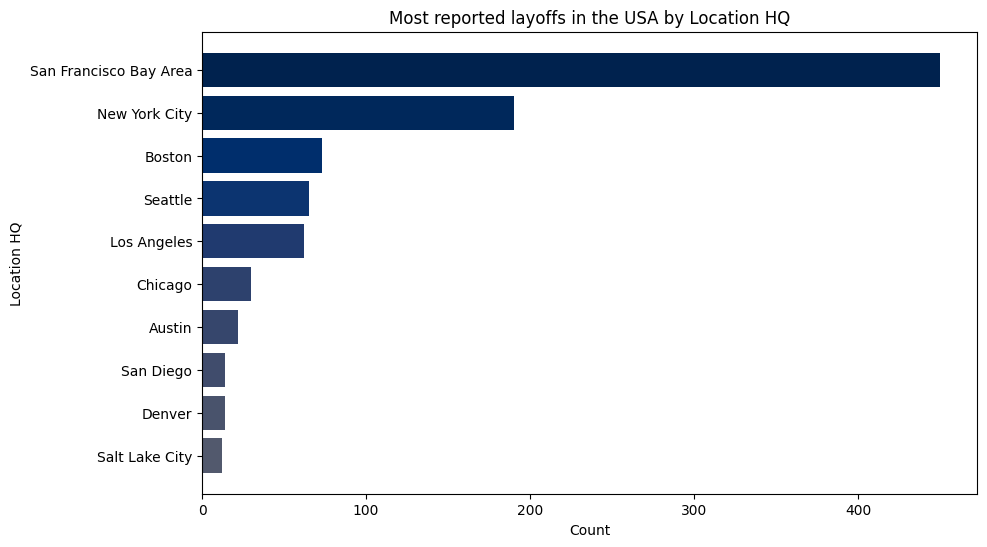

In [72]:
plt.figure(figsize=(10, 6))
plt.barh(Top_10_USA_locations_na['Location_HQ'], Top_10_USA_locations_na['Count'], color=my_palette_Blue_Yellow)
plt.xlabel('Count')
plt.ylabel('Location HQ')
plt.title('Most reported layoffs in the USA by Location HQ')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

## **India:**

In [75]:
india_locations_2023_na = dataset[dataset['Country'] == 'India']

# Count the occurrences of each location and arrange in descending order
india_locations_counts = india_locations_2023_na['Location_HQ'].value_counts().reset_index()
india_locations_counts.columns = ['Location_HQ', 'Count']

# Get the top 3 locations in India
Top_20_india_locations_na = india_locations_counts.head(20)

print(Top_20_india_locations_na)


  Location_HQ  Count
0   Bengaluru     74
1    Gurugram     15
2      Mumbai     10
3   New Delhi      7
4     Chennai      4
5       Noida      2
6        Pune      1
7   Ahmedabad      1
8      Nashik      1


<ipython-input-77-6ff251f8c2cf>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-77-6ff251f8c2cf>:2: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14

<ipython-input-77-6ff251f8c2cf>:2: UserWarning:

The palette list has more values (30) than needed (9), which may not be intended.



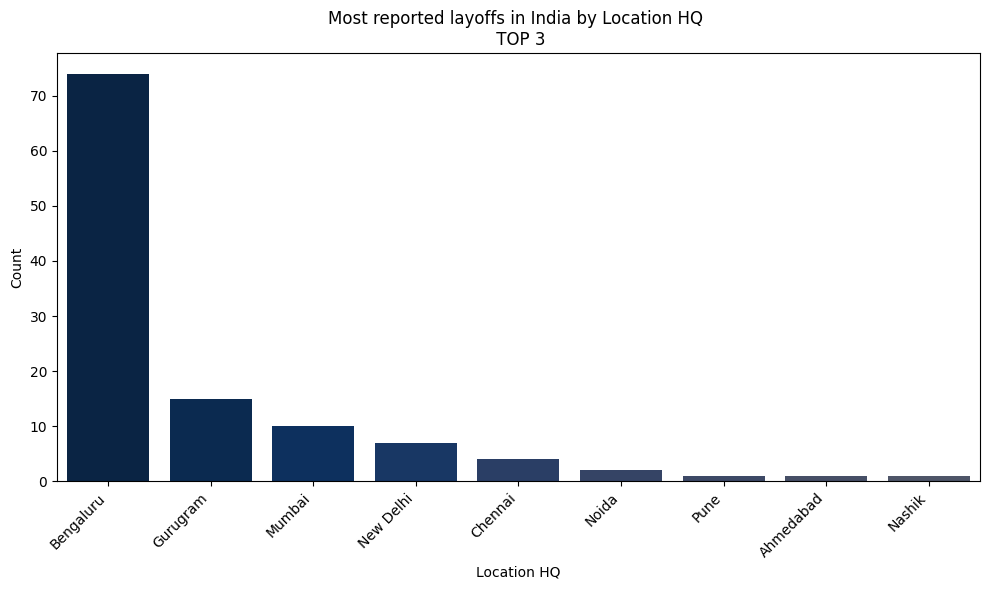

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location_HQ', y='Count', data=Top_20_india_locations_na, palette=my_palette_Blue_Yellow)
plt.xlabel('Location HQ')
plt.ylabel('Count')
plt.title('Most reported layoffs in India by Location HQ \n TOP 3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Canada:**

In [79]:
Top_5_canada_locations_na = dataset[dataset['Country'] == 'Canada'].groupby('Location_HQ').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(5)
print(Top_5_canada_locations_na)


  Location_HQ  Count
6     Toronto     45
3    Montreal     14
7   Vancouver     13
0     Calgary      3
4      Ottawa      2


<ipython-input-81-4fae0b25481b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-81-4fae0b25481b>:2: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14

<ipython-input-81-4fae0b25481b>:2: UserWarning:

The palette list has more values (30) than needed (5), which may not be intended.



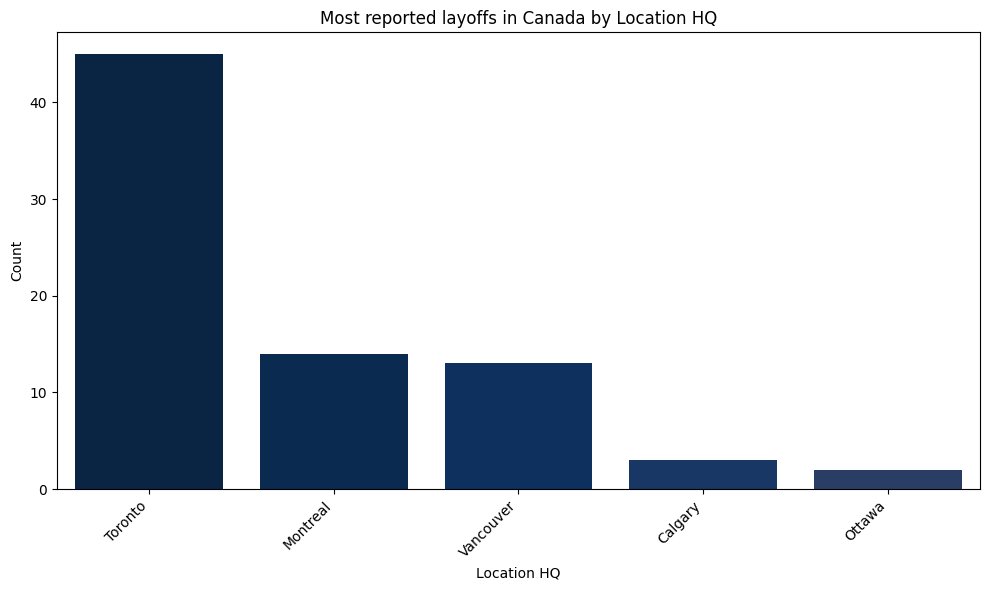

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location_HQ', y='Count', data=Top_5_canada_locations_na, palette=my_palette_Blue_Yellow)
plt.xlabel('Location HQ')
plt.ylabel('Count')
plt.title('Most reported layoffs in Canada by Location HQ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **UK:**

In [82]:
Top_5_UK_locations_na = dataset[dataset['Country'] == 'United Kingdom'].groupby('Location_HQ').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(5)
print(Top_5_UK_locations_na)

  Location_HQ  Count
3      London     51
0     Bristol      1
1     Chester      1
2   Edinburgh      1
4  Manchester      1


<ipython-input-83-6782adfe7b78>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




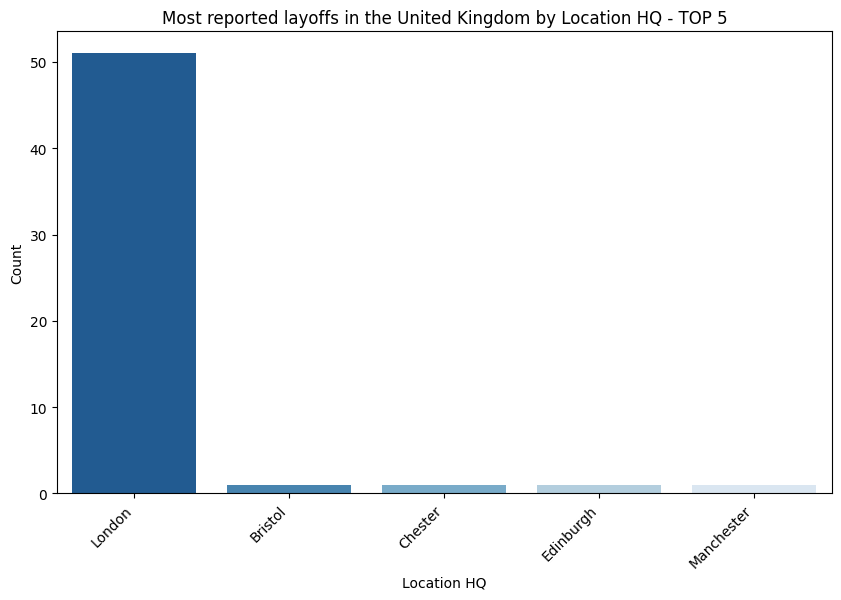

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location_HQ', y='Count', data=Top_5_UK_locations_na, palette='Blues_r')
plt.title('Most reported layoffs in the United Kingdom by Location HQ - TOP 5')
plt.xlabel('Location HQ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## **Germany:**

There are 7 unique HQ locations in Germany in the dataset


['Berlin', 'Frankfurt', 'Hamburg', 'Karlsruhe', 'Kiel', 'Munich', 'Walldorf']


The dataset Germany has 59 entries.


There are 48 unique companies in Germany in the dataset




<ipython-input-87-db9e98e91258>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




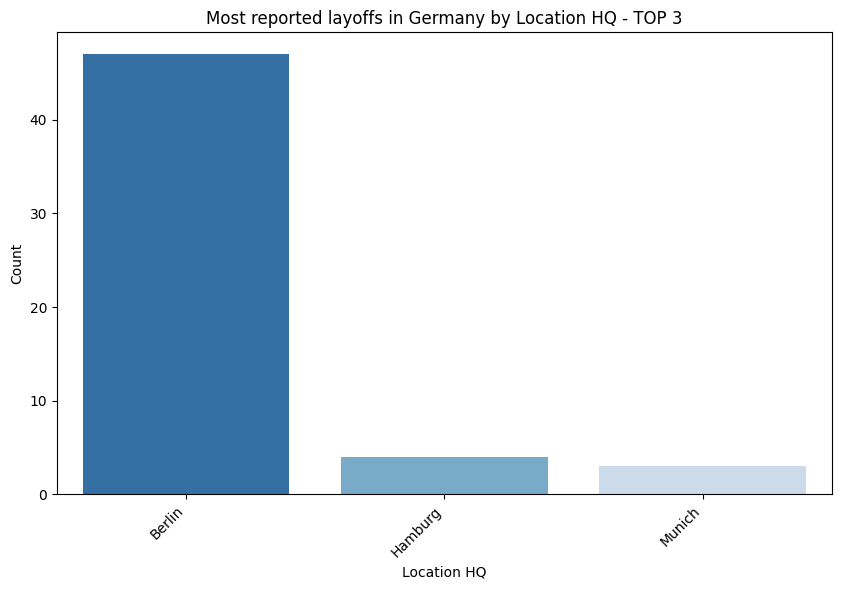

In [87]:
# Filter the dataset for entries from Germany and count occurrences of each location
germany_locations_2023_na = dataset[dataset['Country'] == 'Germany'].groupby('Location_HQ').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Print message about unique HQ locations in Germany
unique_germany_locations_na = dataset[dataset['Country'] == 'Germany']['Location_HQ'].nunique()
print("There are", unique_germany_locations_na, "unique HQ locations in Germany in the dataset")

print("\n")

# Print unique HQ locations in Germany
unique_HQ_list_germany_na = sorted(dataset[dataset['Country'] == 'Germany']['Location_HQ'].unique())
print(unique_HQ_list_germany_na)

print("\n")

# Count entries for Germany
entries_germany_count_na = dataset[dataset['Country'] == 'Germany'].shape[0]
print("The dataset Germany has", entries_germany_count_na, "entries.")

print("\n")

# Count unique companies in Germany
unique_germany_companies_na = dataset[dataset['Country'] == 'Germany']['Company'].nunique()
print("There are", unique_germany_companies_na, "unique companies in Germany in the dataset")

print("\n")

# Select top 3 Germany locations
Top_3_Germany_locations_na = germany_locations_2023_na.head(3)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Location_HQ', y='Count', data=Top_3_Germany_locations_na, palette='Blues_r')
plt.title('Most reported layoffs in Germany by Location HQ - TOP 3')
plt.xlabel('Location HQ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [94]:
dataset['Date_layoffs']

0      2023-12-20
1      2023-12-19
2      2023-12-18
3      2023-12-18
4      2023-12-14
          ...    
1667   2023-12-12
1668   2023-12-11
1669   2023-12-09
1670   2023-12-09
1671   2023-12-09
Name: Date_layoffs, Length: 1672, dtype: datetime64[ns]

##**Timeline of Dataset:**

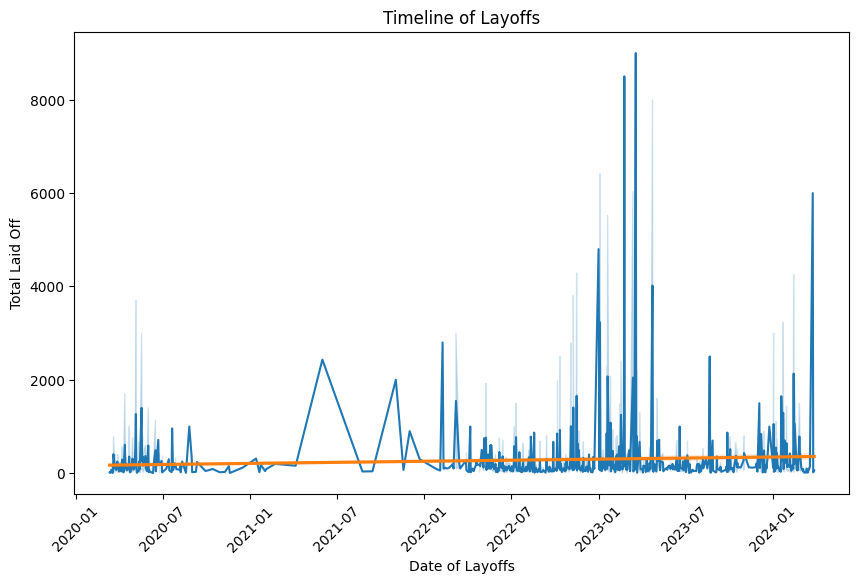

In [96]:


# Round Percentage column to 1 decimal place
dataset['Percentage'] = dataset['Percentage'].round(1)

# Convert Date_layoffs to numeric format
dataset['Date_layoffs_numeric'] = mdates.date2num(dataset['Date_layoffs'])

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date_layoffs', y='Laid_Off', data=dataset)
sns.regplot(x='Date_layoffs_numeric', y='Laid_Off', data=dataset, scatter=False)
plt.xlabel('Date of Layoffs')
plt.ylabel('Total Laid Off')
plt.title('Timeline of Layoffs')
plt.xticks(rotation=45)
plt.show()


In [99]:
# Check unique values in the Laid_Off column
print(dataset['Laid_Off'].unique())

[2.000e+02 1.000e+02 3.500e+02 9.000e+02 1.300e+02 2.350e+02 2.250e+02
 1.500e+01 8.390e+02 1.500e+02 1.450e+02 4.000e+01 1.500e+03 3.000e+01
 2.650e+02 1.280e+02 1.200e+02 1.250e+02 8.000e+02 6.500e+01 5.000e+02
 2.500e+02 7.300e+01 1.190e+02 1.400e+02 2.100e+01 2.300e+02 3.500e+01
 6.600e+02 8.000e+01 1.720e+02 8.400e+01 2.000e+01 1.140e+02 2.900e+01
 7.800e+02 8.600e+01 2.600e+01 2.800e+01 8.700e+02 1.310e+02 7.500e+01
 2.370e+02 1.750e+02 8.700e+01 2.700e+01 3.400e+01 3.600e+02 2.400e+01
 1.700e+01 6.000e+01 5.000e+01 4.500e+01 3.700e+01 7.000e+02 8.000e+00
 1.010e+02 9.500e+01 2.500e+03 2.830e+02 1.490e+02 3.000e+02 7.000e+01
 5.790e+02 4.700e+02 7.100e+01 4.200e+01 5.800e+01 1.170e+02 1.060e+02
 1.300e+01 4.000e+02 2.550e+02 6.100e+01 9.000e+01 4.600e+01 6.700e+01
 1.400e+01 1.700e+02 4.000e+00 1.000e+03 1.340e+02 1.810e+02 3.800e+01
 4.800e+01 3.900e+01 1.020e+02 8.100e+01 1.550e+02 3.200e+02 2.700e+02
 2.200e+01 1.640e+02 6.300e+01 4.200e+02 3.400e+02 1.600e+02 2.900e+02
 7.160

## **Dataset by companies**

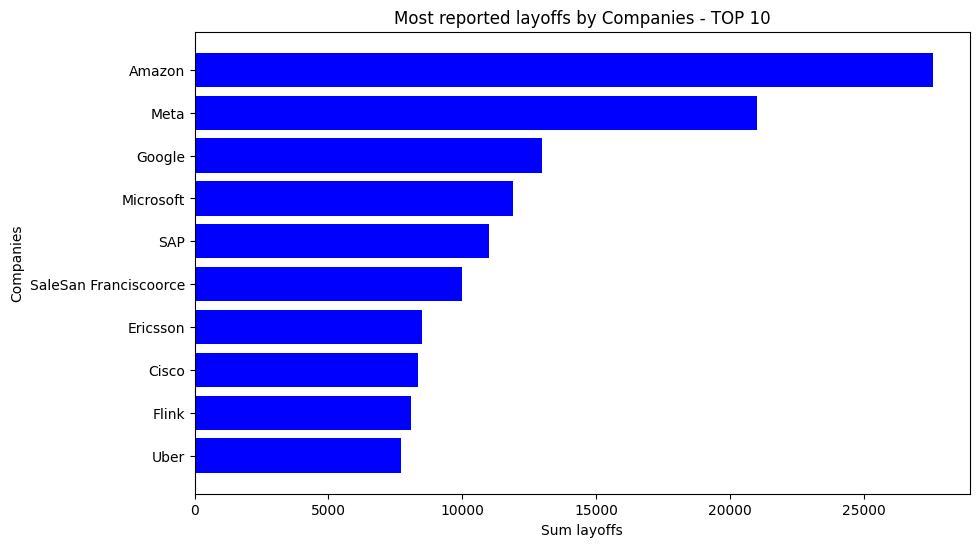

                  Company         Country      Continent
1031                Ahead             USA  North America
1357              Amplero             USA  North America
1263                 Atsu             USA  North America
995           BeyondMinds          Israel           Asia
145               Bitwise             USA  North America
1134             Bluprint             USA  North America
1071     Bridge Connector             USA  North America
428           Britishvolt  United Kingdom         Europe
844    Butler Hospitality             USA  North America
1086    Buy.com / Rakuten             USA  North America
1376          Consider.co             USA  North America
29                 Convoy             USA  North America
870             Crejo.Fun           India           Asia
1102                 Dark             USA  North America
1418             Deadspin             USA  North America
84               Dealtale          Israel           Asia
118             DeepVerge      

In [105]:
# Assuming 'Tech_layoffs_geo' is your DataFrame containing the data

# Calculate total laid off by company
companies_with_laid_off_count = dataset.groupby('Company')['Laid_Off'].sum().reset_index()

# Find top 10 companies with the highest total laid off
top_10_companies = companies_with_laid_off_count.nlargest(10, 'Laid_Off')

# Plot the top 10 companies with the highest total laid off
plt.figure(figsize=(10, 6))
plt.barh(top_10_companies['Company'], top_10_companies['Laid_Off'], color='blue')
plt.xlabel('Sum layoffs')
plt.ylabel('Companies')
plt.title('Most reported layoffs by Companies - TOP 10')
plt.gca().invert_yaxis()
plt.show()

# Find companies with 100% layoff percentage
companies_percentage_100 = dataset[dataset['Percentage'] == 100.0][['Company', 'Country', 'Continent']].drop_duplicates().sort_values(by='Company')

print(companies_percentage_100)

## **Companies that reported 100% of datasets:**

In [107]:
unique_companies_100_percentage = companies_percentage_100.drop_duplicates()

total_companies_100_percentage = unique_companies_100_percentage['Company'].nunique()

print("The dataset has", total_companies_100_percentage, "entries with 100% layoffs reported.")
print()

print("The companies are:")
print(unique_companies_100_percentage)


The dataset has 52 entries with 100% layoffs reported.

The companies are:
                  Company         Country      Continent
1031                Ahead             USA  North America
1357              Amplero             USA  North America
1263                 Atsu             USA  North America
995           BeyondMinds          Israel           Asia
145               Bitwise             USA  North America
1134             Bluprint             USA  North America
1071     Bridge Connector             USA  North America
428           Britishvolt  United Kingdom         Europe
844    Butler Hospitality             USA  North America
1086    Buy.com / Rakuten             USA  North America
1376          Consider.co             USA  North America
29                 Convoy             USA  North America
870             Crejo.Fun           India           Asia
1102                 Dark             USA  North America
1418             Deadspin             USA  North America
84           

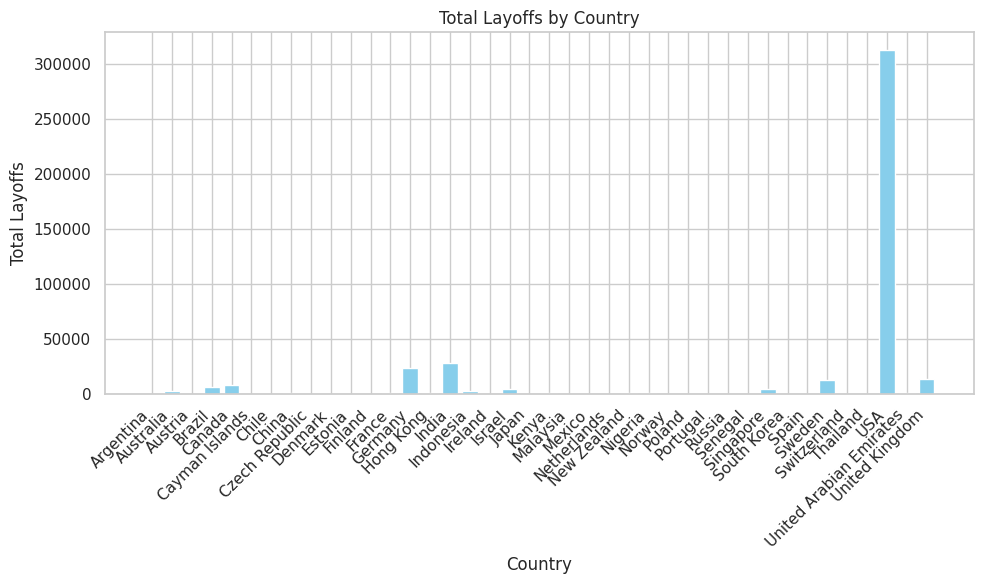

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is named 'Tech_layoffs_geo' and it contains a column named 'Country' representing the country for each entry

# Group the data by 'Country' and calculate the total number of layoffs for each country
country_layoffs = dataset.groupby('Country')['Laid_Off'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(country_layoffs['Country'], country_layoffs['Laid_Off'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Layoffs')
plt.title('Total Layoffs by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **Maps of locations of Dataset:**

In [110]:
import folium

# Create a map object
myMap = folium.Map()

# Add tiles to the map
folium.TileLayer('openstreetmap').add_to(myMap)

# Loop through each row in the dataframe
for index, row in dataset.iterrows():
    # Get latitude and longitude from the dataframe
    lat = row['lat']
    lng = row['lng']

    # Add marker to the map
    folium.Marker(location=[lat, lng]).add_to(myMap)

# Display the map
myMap


In [112]:
from IPython.display import IFrame
IFrame('https://public.tableau.com/views/Techlayoffs2020to2024/Dashboard1?:embed=y&:display_count=yes&:showVizHome=no', width=1300, height=800)